In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn.metrics import accuracy_score

class Perceptron(object):             
  def __init__(self, x_train, y_train, mu, epochs=100):
    # add one for bias
    self.n, _ = x_train.shape
    self.x_train = np.c_[np.ones(self.n), x_train]
    _, self.d = self.x_train.shape
    # self.W = [[0.1],[0.1],[0]]
    self.w = np.zeros([self.d, 1])
    self.epochs, self.mu, self.epsilon = epochs, mu
    self.y_true = y_train

  def predict(self, x):
    return np.sign(x.dot(self.W))   

  def seq_fit(self, verbose=False, plot=False):
    """
    Sequential Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
            self.W = self.W + self.lr*(self.y_true[i] * self.X_train[i].reshape([self.d,1]))
      err = self.error()   
      error_list.append(self.error())

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)

    return self.W, error_list, epoch+1

  def batch_fit(self, verbose=False, plot=False):
    """
    Batch Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)] 
                                          * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break
    
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
        
    return self.W, error_list, epoch+1

  def error(self, X_test=None, y_test=None):
    """
    Used to calculate the residual sum of squares (RSS) error.
    If X_test and y_test are not given, returns the training RSS,
    otherwise test RSS.
    """
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]

  def plot(self, a, b, bias, epoch):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'yo')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'ro')

    xx = np.linspace(-1,11,5000)
    yy = (a*xx + bias)/(-1*b)
    plt.plot(xx, yy,'b')
    plt.title("epoch "+str(epoch))
    plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
    plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
    plt.show()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 47)

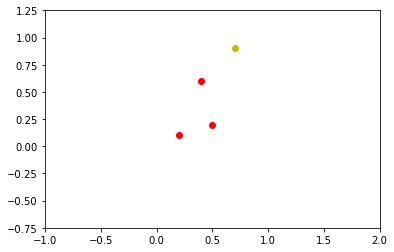

In [11]:
#small dataset for sequential training
X = np.array([
    [0.2, 0.1],
    [0.4, 0.6],
    [0.5, 0.2],
    [0.7, 0.9]
])
y = np.array([1, 1, 1, -1]).reshape(4)
plt.plot(X[:, 0][y == -1], X[:, 1][y == -1], 'yo')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'ro')
plt.xlim(-1,2)
plt.ylim(-0.75,1.25)
perceptron = Perceptron(X, y, epochs=10, lr=0.2)
#w,err,_ = perceptron.seq_fit(verbose = True,plot=True)
w, err, _ = perceptron.batch_fit()